In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
plays = pd.read_csv("../plays.csv")
games = pd.read_csv("../games.csv")

In [12]:
games = games[games['seasonType'] == 'REG']
games = games.drop(['gameDate','gameTimeEastern', 'gameTimeLocal', 'weekNameAbbr', 'siteId','homeTeamDistance','visitingTeamDistance'], axis = 1)
games['total_pts'] = games['homeTeamFinalScore'] + games['visitingTeamFinalScore'] 
games.head()

,gameId,season,week,homeTeamId,visitorTeamId,seasonType,homeTeamFinalScore,visitingTeamFinalScore,winningTeam,total_pts
65,26909,2004,1,3200,2200,REG,27,24,3200,51
66,26914,2004,1,2700,2100,REG,7,17,2100,24
67,26913,2004,1,2120,4400,REG,20,27,4400,47
68,26915,2004,1,3300,4600,REG,7,21,4600,28
69,26916,2004,1,3430,920,REG,31,24,3430,55


In [14]:
plays = plays[plays['playType'].isin(['pass', 'field goal', 'rush', 'xp'])]
plays = plays[['playId','gameId','possessionTeamId','nonpossessionTeamId','playType','playType2','distanceToGoalPre','netYards','visitingScorePre','visitingScorePost','homeScorePre', 'homeScorePost','distance', 'offensiveYards','distanceToGoalPost']]
plays['pontuacao'] = plays['visitingScorePost'] - plays['visitingScorePre'] + plays['homeScorePost'] - plays['homeScorePre']
plays.head()

,playId,gameId,possessionTeamId,nonpossessionTeamId,playType,playType2,distanceToGoalPre,netYards,visitingScorePre,visitingScorePost,homeScorePre,homeScorePost,distance,offensiveYards,distanceToGoalPost,pontuacao
1,30299,26909,3200,2200,pass,"pass, complete",63.0,19,0,0,0,0,10,19,44.0,0
2,30300,26909,3200,2200,pass,"pass, complete",44.0,14,0,0,0,0,10,14,30.0,0
3,30301,26909,3200,2200,pass,"pass, incomplete",30.0,0,0,0,0,0,10,0,30.0,0
4,30302,26909,3200,2200,pass,"pass, complete",30.0,2,0,0,0,0,10,2,28.0,0
5,30303,26909,3200,2200,pass,"pass, complete",28.0,14,0,0,0,0,8,14,14.0,0


In [16]:
df = plays.merge(games, on = 'gameId', how = 'inner')
df.head()

,playId,gameId,possessionTeamId,nonpossessionTeamId,playType,playType2,distanceToGoalPre,netYards,visitingScorePre,visitingScorePost,...,pontuacao,season,week,homeTeamId,visitorTeamId,seasonType,homeTeamFinalScore,visitingTeamFinalScore,winningTeam,total_pts
0,30299,26909,3200,2200,pass,"pass, complete",63.0,19,0,0,...,0,2004,1,3200,2200,REG,27,24,3200,51
1,30300,26909,3200,2200,pass,"pass, complete",44.0,14,0,0,...,0,2004,1,3200,2200,REG,27,24,3200,51
2,30301,26909,3200,2200,pass,"pass, incomplete",30.0,0,0,0,...,0,2004,1,3200,2200,REG,27,24,3200,51
3,30302,26909,3200,2200,pass,"pass, complete",30.0,2,0,0,...,0,2004,1,3200,2200,REG,27,24,3200,51
4,30303,26909,3200,2200,pass,"pass, complete",28.0,14,0,0,...,0,2004,1,3200,2200,REG,27,24,3200,51


In [18]:
ataque1 = pd.DataFrame(df[df['playType'].isin(['rush', 'pass'])].groupby(['season', 'possessionTeamId', 'playType']).sum()['offensiveYards']).reset_index()
ataque1 = ataque1.pivot(index=["season", "possessionTeamId"], columns=["playType"],values="offensiveYards").reset_index()
ataque1.columns = ['season', 'teamId', 'pass', 'rush']
ataque1

,season,teamId,pass,rush
0,2004,200,2412,2688
1,2004,325,2312,2081
2,2004,610,2830,1869
3,2004,750,3643,1590
4,2004,810,2192,1630
...,...,...,...,...
507,2019,4400,4628,1503
508,2019,4500,3918,2402
509,2019,4600,3952,2305
510,2019,4900,4921,1597


In [20]:
ataque2 = pd.DataFrame(df.groupby(['season', 'possessionTeamId']).sum()['pontuacao']).reset_index()
ataque2.columns = ['season', 'teamId', 'points']
ataque2

,season,teamId,points
0,2004,200,312
1,2004,325,275
2,2004,610,351
3,2004,750,351
4,2004,810,207
...,...,...,...
507,2019,4400,341
508,2019,4500,459
509,2019,4600,415
510,2019,4900,456


In [22]:
defesa1 = pd.DataFrame(df[df['playType'].isin(['rush', 'pass'])].groupby(['season', 'nonpossessionTeamId', 'playType']).sum()['offensiveYards']).reset_index()
defesa1 = defesa1.pivot(index=["season", "nonpossessionTeamId"], columns=["playType"],values="offensiveYards").reset_index()
defesa1.columns = ['season', 'teamId', 'pass_against', 'rush_against']
defesa1

,season,teamId,pass_against,rush_against
0,2004,200,3526,1688
1,2004,325,3121,1692
2,2004,610,2624,1614
3,2004,750,3478,1921
4,2004,810,3335,2063
...,...,...,...,...
507,2019,4400,3298,1946
508,2019,4500,2817,1884
509,2019,4600,4358,1984
510,2019,4900,4420,1283


In [24]:
defesa2 = pd.DataFrame(df.groupby(['season', 'nonpossessionTeamId']).sum()['pontuacao']).reset_index()
defesa2.columns = ['season', 'teamId', 'points_against']
defesa2

,season,teamId,points_against
0,2004,200,351
1,2004,325,282
2,2004,610,290
3,2004,750,339
4,2004,810,347
...,...,...,...
507,2019,4400,317
508,2019,4500,314
509,2019,4600,374
510,2019,4900,431


In [26]:
dfzera = ataque1.merge(ataque2, how = 'inner', on = ['teamId','season'])
dfzera = dfzera.merge(defesa1, how = 'inner', on = ['teamId','season'])
dfzera = dfzera.merge(defesa2, how = 'inner', on = ['teamId','season'])

dfzera


,season,teamId,pass,rush,points,pass_against,rush_against,points_against
0,2004,200,2412,2688,312,3526,1688,351
1,2004,325,2312,2081,275,3121,1692,282
2,2004,610,2830,1869,351,2624,1614,290
3,2004,750,3643,1590,351,3478,1921,339
4,2004,810,2192,1630,207,3335,2063,347
...,...,...,...,...,...,...,...,...
507,2019,4400,4628,1503,341,3298,1946,317
508,2019,4500,3918,2402,459,2817,1884,314
509,2019,4600,3952,2305,415,4358,1984,374
510,2019,4900,4921,1597,456,4420,1283,431


In [28]:
chute = df[df['playType'].isin(['field goal','xp'])][['gameId','season','possessionTeamId','nonpossessionTeamId','playType', 'distanceToGoalPre','pontuacao']].reset_index(drop = True)
chute = chute[chute['pontuacao'].isin([0,1,3])].reset_index(drop = True)
chute 
def corrige_na(df):
    listax = []
    for i in range(len(df['season'])):

        if (pd.isna(df.loc[i, 'distanceToGoalPre'])) & (df.loc[i, 'season'] < 2015):
            listax.append(20)
        elif (pd.isna(df.loc[i, 'distanceToGoalPre'])) & (df.loc[i, 'season'] >= 2015):
            listax.append(33)  
        else:
            listax.append(df.loc[i, 'distanceToGoalPre'])
        
    df['distanceToGoalPre'] = listax

corrige_na(chute)


chute['distanceToGoalPre'] = chute['distanceToGoalPre']+18
chute['conversao'] = chute['pontuacao'] != 0
chute['distancia_aprox'] = (chute['distanceToGoalPre']//5)*5


chute.sample(5)

,gameId,season,possessionTeamId,nonpossessionTeamId,playType,distanceToGoalPre,pontuacao,conversao,distancia_aprox
22738,56288,2014,3900,2200,xp,20.0,1,True,20.0
8836,29579,2008,2310,1400,field goal,21.0,3,True,20.0
11750,54608,2009,4400,3700,xp,20.0,1,True,20.0
26083,56752,2015,2200,2100,field goal,52.0,3,True,50.0
31352,57656,2018,1200,2250,xp,33.0,1,True,30.0


,distancia_aprox,conversao
0,15.0,99.473684
1,20.0,98.486434
2,25.0,94.465116
3,30.0,92.682927
4,35.0,88.484657
5,40.0,79.067832
6,45.0,70.819257
7,50.0,64.678633
8,55.0,50.144092
9,60.0,30.645161


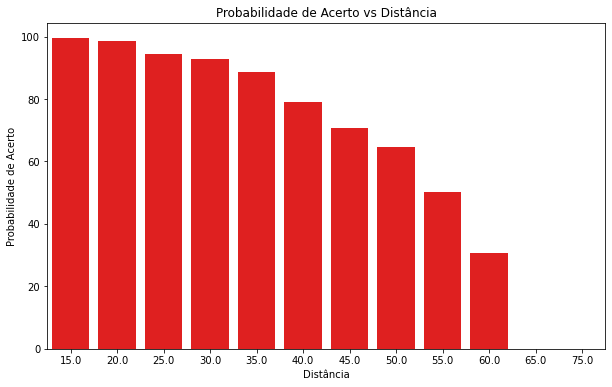

In [29]:
x = pd.DataFrame(chute.groupby('distancia_aprox').mean()['conversao']*100).reset_index()
display(x)

plt.figure(figsize = (10,6))
plt.title("Probabilidade de Acerto vs Distância")
sns.barplot(x = 'distancia_aprox', y='conversao', data=x, color = 'red')
plt.ylabel("Probabilidade de Acerto")
plt.xlabel("Distância");

